# Facebook network analysis

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics as stat
import numpy as np
import seaborn as sns
from collections import Counter

Load the data

In [9]:
file_path="sample_data/facebook.txt"
with open(file_path) as file:
  data = file.read()

Create the edges list

In [14]:
edges = []
for line in data.split("\n"):
  nodes = line.split(" ")
  edge = (int(nodes[0]), int(nodes[1]))
  edges.append(edge)

Create the graph

In [ ]:
G = nx.Graph(edges)

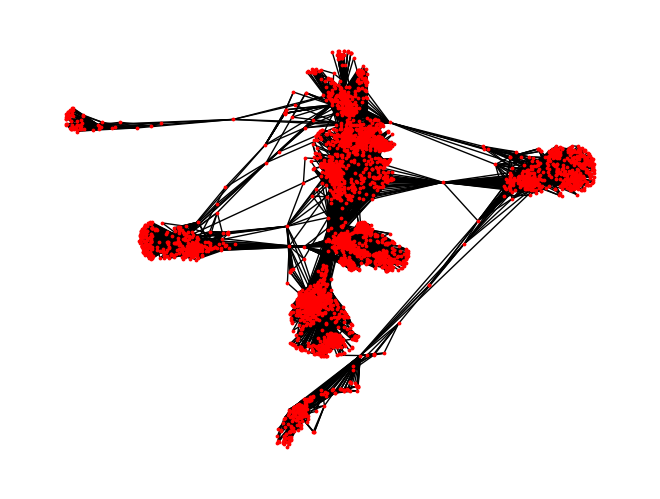

In [16]:
layout = nx.spring_layout(G)
nx.draw(G, pos = layout, node_size = 3, node_color = "red")

**Calculating properties of the graph:**
- Size of the graph
- Number of nodes
- Average degree
- Average shortest path

**Size of the graph**

In [20]:
# size of the graph is the number of edges
edges_number = G.number_of_edges()
edges_number

88234

**Number of nodes**

In [21]:
nodes_number = G.number_of_nodes()
nodes_number

4039

**Average shortest path**

In [22]:
L = nx.average_shortest_path_length(G)
L

3.6925068496963913

In [51]:
# G.degree(n) num of degrees of the node n
degrees = [G.degree(n) for n in G.nodes()]

In [27]:
average_degree = stat.mean(degrees)
average_degree

43.69101262688784

**Three most important nodes**

- Calculating the degree centrality of each node
- Calculating the load centrality of each node

*(centrality - importance of a node in a graph, degree centrality - the fraction of nodes it is connected to, load centrality - the fraction of all shortest paths that pass through that node)*


**Calculating the degree centrality**


In [40]:
degree_centrality = nx.degree_centrality(G)
dict_items = degree_centrality.items()
dict_items_sorted = sorted(dict_items, key = lambda item:item[1], reverse = True)
degree_centrality_sorted = {k:v for k,v in dict_items_sorted}
most_important_nodes = list(degree_centrality_sorted)[:3]
most_important_nodes

[107, 1684, 1912]

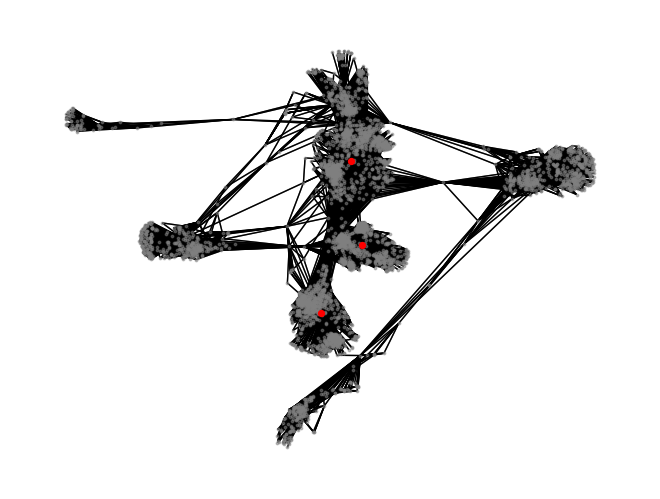

In [42]:
nx.draw(G, pos = layout, node_color = "gray", node_size = 3, alpha = 0.5)
nx.draw(G, pos = layout, nodelist = most_important_nodes, node_color = "red", node_size = 18, alpha = 1)


**Calculating the load centrality**

In [44]:
load_centrality = nx.load_centrality(G)
dict_loadc = load_centrality.items()
dict_loadc_sorted = sorted(dict_loadc, key = lambda item:item[1], reverse = True)
load_centrality_sorted = {k:v for k,v in dict_loadc_sorted}
most_important_nodes_dc = list(load_centrality_sorted)[:3]
most_important_nodes_dc

[107, 1684, 3437]

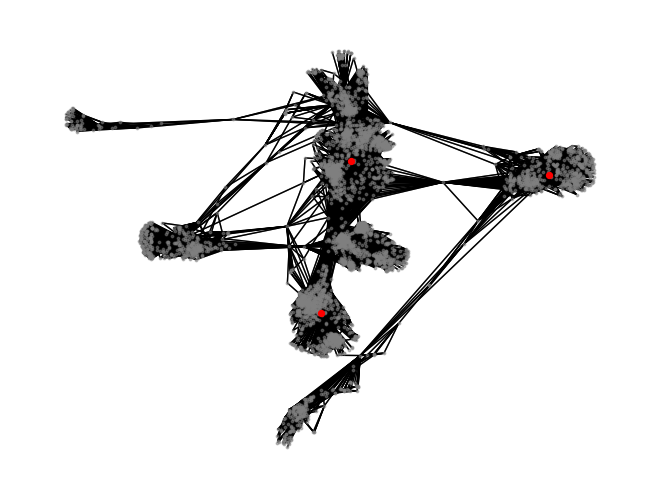

In [45]:
nx.draw(G, pos = layout, node_color = "gray", node_size = 3, alpha = 0.5)
nx.draw(G, pos = layout, nodelist = most_important_nodes_dc, node_color = "red", node_size = 18, alpha = 1)

**Is it a Scale-free graph?**

Check the degree distribution

Degree frequencies

In [54]:
degrees = [G.degree(n) for n in G.nodes()]
deg_counter = Counter(degrees)
degs, deg_freq = zip(*deg_counter.items())

Text(0, 0.5, 'count')

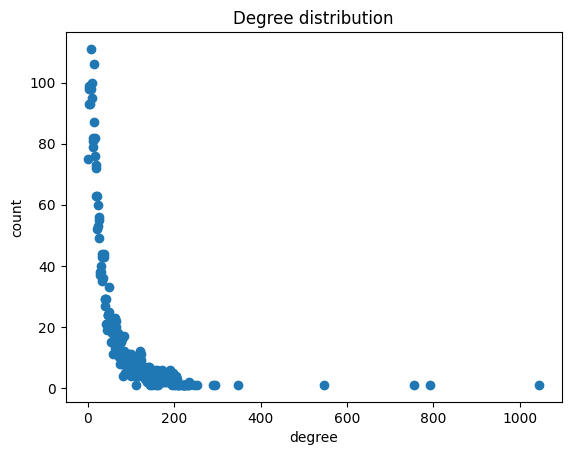

In [55]:
plt.scatter(degs, deg_freq)
plt.title("Degree distribution")
plt.xlabel("degree")
plt.ylabel("count")

In [ ]:
final_step = int(size_of_graph/100)*100

In [66]:
size = []
max_k = []
for i in list(range(100, final_step, 100)):
  curr_step_edges = edges[:i]
  curr_step_graph = nx.Graph(curr_step_edges)
  degsc = [curr_step_graph.degree(n) for n in curr_step_graph.nodes()]
  max_deg = max(degsc)
  gr_size = curr_step_graph.number_of_nodes()
  max_k.append(max_deg)
  size.append(gr_size)

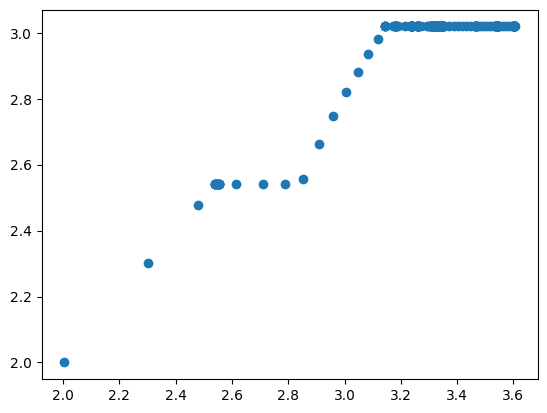

In [67]:
ps = np.log10(size)
pm = np.log10(max_k)
plt.scatter(ps, pm)